# Αναγνώριση Προτύπων

### 3η Εργαστηριακή Άσκηση
### Αναγνώριση Είδους και Εξαγωγή Συναισθήματος από Μουσική

Ακαρέπης Ανδρέας, 03117058

Κόντη Πολυξένη Ειρήνη, 03117180

In [ ]:
import librosa.display
import matplotlib.pyplot as plt
import os
import numpy as np

In [ ]:
os.listdir("../input/patreco3-multitask-affective-music/data/")

['multitask_dataset_beat',
 'fma_genre_spectrograms',
 'fma_genre_spectrograms_beat',
 'multitask_dataset']

**Βήμα 1**

Επιλέγονται τα αρχεία '65784.beatsync.fused.npy.gz' και '80238.beatsync.fused.npy.gz' που ανήκουν στις κατηγορίες classical και blues αντίστοιχα

In [ ]:
#β
specClassical = np.load('/kaggle/input/patreco3-multitask-affective-music/data/fma_genre_spectrograms/train/65784.fused.full.npy')
specBlues = np.load('/kaggle/input/patreco3-multitask-affective-music/data/fma_genre_spectrograms/train/80238.fused.full.npy')

In [ ]:
print(specClassical.shape)
print(specBlues.shape)

(140, 1291)
(140, 1293)


In [ ]:
melClassical, chromaClassical = specClassical[:128], specClassical[128:]
melBlues, chromaBlues = specBlues[:128], specBlues[128:]

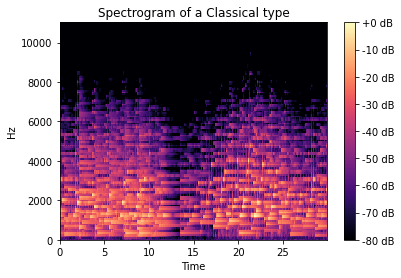

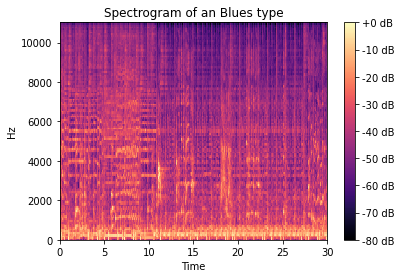

In [ ]:
#γ
fig, ax = plt.subplots()
img = librosa.display.specshow(melClassical, x_axis='time', y_axis='linear', ax=ax)
ax.set(title='Spectrogram of a Classical type')
fig.colorbar(img, ax=ax, format="%+2.f dB")


fig, ax = plt.subplots()
img = librosa.display.specshow(melBlues, x_axis='time', y_axis='linear', ax=ax)
ax.set(title='Spectrogram of an Blues type')
fig.colorbar(img, ax=ax, format="%+2.f dB")

**Βήμα 2**

In [ ]:
#α
print(melClassical.shape)
print(melBlues.shape)

(128, 1291)
(128, 1293)


In [ ]:
#β
specClassicalBeat = np.load('/kaggle/input/patreco3-multitask-affective-music/data/fma_genre_spectrograms_beat/train/65784.fused.full.npy')
specBluesBeat = np.load('/kaggle/input/patreco3-multitask-affective-music/data/fma_genre_spectrograms_beat/train/80238.fused.full.npy')

In [ ]:
print(specClassicalBeat.shape)
print(specBluesBeat.shape)

(140, 79)
(140, 56)


In [ ]:
melClassicalBeat, chromaClassicalBeat = specClassicalBeat[:128], specClassicalBeat[128:]
melBluesBeat, chromaBluesBeat = specBluesBeat[:128], specBluesBeat[128:]

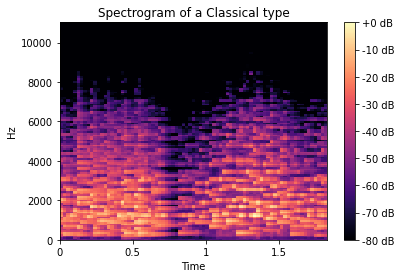

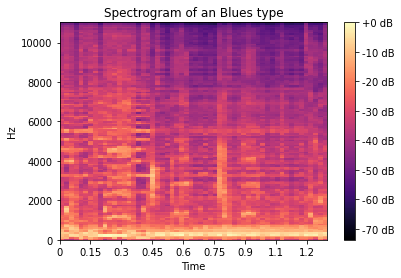

In [ ]:
fig, ax = plt.subplots()
img = librosa.display.specshow(melClassicalBeat, x_axis='time', y_axis='linear', ax=ax)
ax.set(title='Spectrogram of a Classical type')
fig.colorbar(img, ax=ax, format="%+2.f dB")


fig, ax = plt.subplots()
img = librosa.display.specshow(melBluesBeat, x_axis='time', y_axis='linear', ax=ax)
ax.set(title='Spectrogram of an Blues type')
fig.colorbar(img, ax=ax, format="%+2.f dB")

**Βήμα 3**

In [ ]:
print(chromaClassical.shape)
print(chromaBlues.shape)

print(chromaClassicalBeat.shape)
print(chromaBluesBeat.shape)

(12, 1291)
(12, 1293)
(12, 79)
(12, 56)


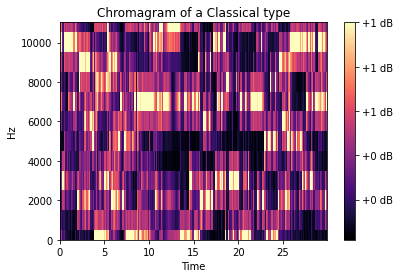

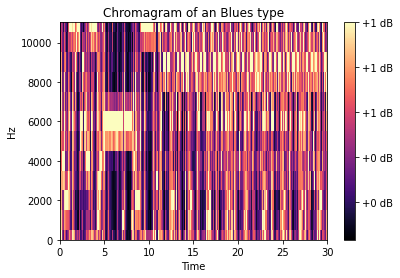

In [ ]:
fig, ax = plt.subplots()
img = librosa.display.specshow(chromaClassical, x_axis='time', y_axis='linear', ax=ax)
ax.set(title='Chromagram of a Classical type')
fig.colorbar(img, ax=ax, format="%+2.f dB")


fig, ax = plt.subplots()
img = librosa.display.specshow(chromaBlues, x_axis='time', y_axis='linear', ax=ax)
ax.set(title='Chromagram of an Blues type')
fig.colorbar(img, ax=ax, format="%+2.f dB")

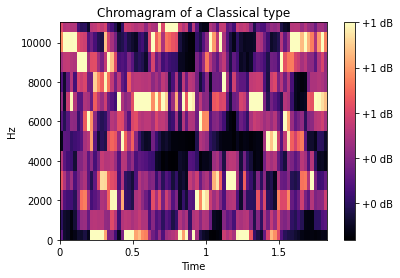

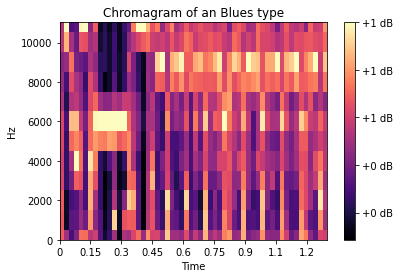

In [ ]:
fig, ax = plt.subplots()
img = librosa.display.specshow(chromaClassicalBeat, x_axis='time', y_axis='linear', ax=ax)
ax.set(title='Chromagram of a Classical type')
fig.colorbar(img, ax=ax, format="%+2.f dB")


fig, ax = plt.subplots()
img = librosa.display.specshow(chromaBluesBeat, x_axis='time', y_axis='linear', ax=ax)
ax.set(title='Chromagram of an Blues type')
fig.colorbar(img, ax=ax, format="%+2.f dB")

**Βήμα 4**

In [ ]:
import copy
import numpy as np
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import DataLoader, Dataset, SubsetRandomSampler

# HINT: Use this class mapping to merge similar classes and ignore classes that do not work very well
CLASS_MAPPING = {
    "Rock": "Rock",
    "Psych-Rock": "Rock",
    "Indie-Rock": None,
    "Post-Rock": "Rock",
    "Psych-Folk": "Folk",
    "Folk": "Folk",
    "Metal": "Metal",
    "Punk": "Metal",
    "Post-Punk": None,
    "Trip-Hop": "Trip-Hop",
    "Pop": "Pop",
    "Electronic": "Electronic",
    "Hip-Hop": "Hip-Hop",
    "Classical": "Classical",
    "Blues": "Blues",
    "Chiptune": "Electronic",
    "Jazz": "Jazz",
    "Soundtrack": None,
    "International": None,
    "Old-Time": None,
}


def torch_train_val_split(
    dataset, batch_train, batch_eval, val_size=0.2, shuffle=True, seed=420
):
    # Creating data indices for training and validation splits:
    dataset_size = len(dataset)
    indices = list(range(dataset_size))
    val_split = int(np.floor(val_size * dataset_size))
    if shuffle:
        np.random.seed(seed)
        np.random.shuffle(indices)
    train_indices = indices[val_split:]
    val_indices = indices[:val_split]

    # Creating PT data samplers and loaders:
    train_sampler = SubsetRandomSampler(train_indices)
    val_sampler = SubsetRandomSampler(val_indices)

    train_loader = DataLoader(dataset, batch_size=batch_train, sampler=train_sampler)
    val_loader = DataLoader(dataset, batch_size=batch_eval, sampler=val_sampler)
    return train_loader, val_loader


def read_spectrogram(spectrogram_file, chroma=False, mel = False):
    # with open(spectrogram_file, "r") as f:
    if chroma == False and mel == False:
        spectrograms = np.load(spectrogram_file)
    elif mel == True:
        spectrograms = np.load(spectrogram_file)[:128]
    else:
        spectrograms = np.load(spectrogram_file)[128:]
    # spectrograms contains a fused mel spectrogram and chromagram
    # Decompose as follows
    return spectrograms.T


class LabelTransformer(LabelEncoder):
    def inverse(self, y):
        try:
            return super(LabelTransformer, self).inverse_transform(y)
        except:
            return super(LabelTransformer, self).inverse_transform([y])

    def transform(self, y):
        try:
            return super(LabelTransformer, self).transform(y)
        except:
            return super(LabelTransformer, self).transform([y])


class PaddingTransform(object):
    def __init__(self, max_length, padding_value=0):
        self.max_length = max_length
        self.padding_value = padding_value

    def __call__(self, s):
        if len(s) == self.max_length:
            return s

        if len(s) > self.max_length:
            return s[: self.max_length]

        if len(s) < self.max_length:
            s1 = copy.deepcopy(s)
            pad = np.zeros((self.max_length - s.shape[0], s.shape[1]), dtype=np.float32)
            s1 = np.vstack((s1, pad))
            return s1


class SpectrogramDataset(Dataset):
    def __init__(
        self, path, class_mapping=None, train=True, max_length=-1, regression=None, chroma = False, mel = False
    ):
        t = "train" if train else "test"
        p = os.path.join(path, t)
        self.regression = regression

        self.index = os.path.join(path, "{}_labels.txt".format(t))
        self.files, labels = self.get_files_labels(self.index, class_mapping)
        self.feats = [read_spectrogram(os.path.join(p, f), chroma, mel) for f in self.files]
        self.feat_dim = self.feats[0].shape[1]
        self.lengths = [len(i) for i in self.feats]
        self.max_length = max(self.lengths) if max_length <= 0 else max_length
        self.zero_pad_and_stack = PaddingTransform(self.max_length)
        self.label_transformer = LabelTransformer()
        if isinstance(labels, (list, tuple)):
            if not regression:
                self.labels = np.array(
                    self.label_transformer.fit_transform(labels)
                ).astype("int64")
            else:
                self.labels = np.array(labels).astype("float64")

    def get_files_labels(self, txt, class_mapping):
        # Returns a list of file names and a list of their labels
        with open(txt, 'r') as fd:
            lines = [l.rstrip().split('\t') for l in fd.readlines()[1:]]
        files, labels = [], []
        for l in lines:
            label = l[1]
            if class_mapping:
                label = class_mapping[l[1]]
            if not label:
                continue
            # Kaggle automatically unzips the npy.gz format so this hack is needed
            _id = l[0].split('.')[0]
            npy_file = '{}.fused.full.npy'.format(_id)
            files.append(npy_file)
            labels.append(label)
            
        return files, labels

    def __getitem__(self, item):
        length = min(self.lengths[item], self.max_length)
        return self.zero_pad_and_stack(self.feats[item]), self.labels[item], length

    def __len__(self):
        return len(self.labels)


if __name__ == "__main__":
    ##################################################################################
    # load fused speectrogram + chromagram for the full (non-beat-synced) data
    ##################################################################################
    specs_fused = SpectrogramDataset('../input/patreco3-multitask-affective-music/data/fma_genre_spectrograms/', train=True,
                                     class_mapping=CLASS_MAPPING, max_length=-1)
    train_loader, val_loader = torch_train_val_split(specs_fused, 32, 32, val_size=.33)
    test_dataset = SpectrogramDataset('../input/patreco3-multitask-affective-music/data/fma_genre_spectrograms/', train=False,
                                     class_mapping=CLASS_MAPPING, max_length=-1)
    test_loader = DataLoader(test_dataset, batch_size=1)
    
    ##################################################################################
    # load single synced mel spectrograms
    ##################################################################################
    # Dataset
    mel_specs = SpectrogramDataset('../input/patreco3-multitask-affective-music/data/fma_genre_spectrograms/', train=True,
                                        class_mapping=CLASS_MAPPING, max_length=-1,mel = True)
    # Train and Test loaders
    train_loader_mel, val_loader_mel = torch_train_val_split(mel_specs, 32, 32, val_size=.33)
    test_dataset_mel = SpectrogramDataset('../input/patreco3-multitask-affective-music/data/fma_genre_spectrograms/', train=False,
                                            class_mapping=CLASS_MAPPING, max_length=-1,mel = True)
    
    test_loader_mel = DataLoader(test_dataset_mel, batch_size=1)
    
    ##################################################################################
    # load beat synced mel spectrograms
    ##################################################################################
    # Dataset
    beat_mel_specs = SpectrogramDataset('../input/patreco3-multitask-affective-music/data/fma_genre_spectrograms_beat/', train=True,
                                         class_mapping=CLASS_MAPPING, max_length=-1,mel = True)
    # Train and Test loaders
    train_loader_beat_mel, val_loader_beat_mel = torch_train_val_split(beat_mel_specs, 32, 32, val_size=.33)
    test_dataset_beat_mel = SpectrogramDataset('../input/patreco3-multitask-affective-music/data/fma_genre_spectrograms_beat/', train=False,
                                                 class_mapping=CLASS_MAPPING, max_length=-1,mel = True)
    test_loader_beat_mel = DataLoader(test_dataset_beat_mel, batch_size=1)
    
    ##################################################################################
    # load beat synced chroma chromagrams
    ##################################################################################
    beat_chroma = SpectrogramDataset('../input/patreco3-multitask-affective-music/data/fma_genre_spectrograms_beat/', train=True,
                                     class_mapping=CLASS_MAPPING, max_length=-1,chroma = True)
    train_loader_beat_chroma, val_loader_beat_chroma = torch_train_val_split(beat_chroma, 32, 32, val_size=.33)
    test_dataset_beat_chroma = SpectrogramDataset('../input/patreco3-multitask-affective-music/data/fma_genre_spectrograms_beat/', train=False,
                                                 class_mapping=CLASS_MAPPING, max_length=-1,chroma = True)
    test_loader_beat_chroma = DataLoader(test_dataset_beat_chroma, batch_size=1)

    


## Πριν την ομαδοποίηση των κλάσεων

In [ ]:
y_train = []
y_test = []

# Train labels
file = open('../input/patreco3-multitask-affective-music/data/fma_genre_spectrograms_beat/train_labels.txt', 'r') 
for line in file.readlines()[1:]: 
    label = line.split()[1]
    y_train.append(label)
    
# Test labels
file = open('../input/patreco3-multitask-affective-music/data/fma_genre_spectrograms_beat/test_labels.txt', 'r') 
for line in file.readlines()[1:]: 
    label = line.split()[1]
    y_test.append(label)
unique_train = np.unique(np.array(y_train))
unique_test = np.unique(np.array(y_test))
print(unique_train)
print(unique_test)

['Blues' 'Chiptune' 'Classical' 'Electronic' 'Folk' 'Hip-Hop' 'Indie-Rock'
 'International' 'Jazz' 'Metal' 'Old-Time' 'Pop' 'Post-Punk' 'Post-Rock'
 'Psych-Folk' 'Psych-Rock' 'Punk' 'Rock' 'Soundtrack' 'Trip-Hop']
['Blues' 'Chiptune' 'Classical' 'Electronic' 'Folk' 'Hip-Hop' 'Indie-Rock'
 'International' 'Jazz' 'Metal' 'Old-Time' 'Pop' 'Post-Punk' 'Post-Rock'
 'Psych-Folk' 'Psych-Rock' 'Punk' 'Rock' 'Soundtrack' 'Trip-Hop']


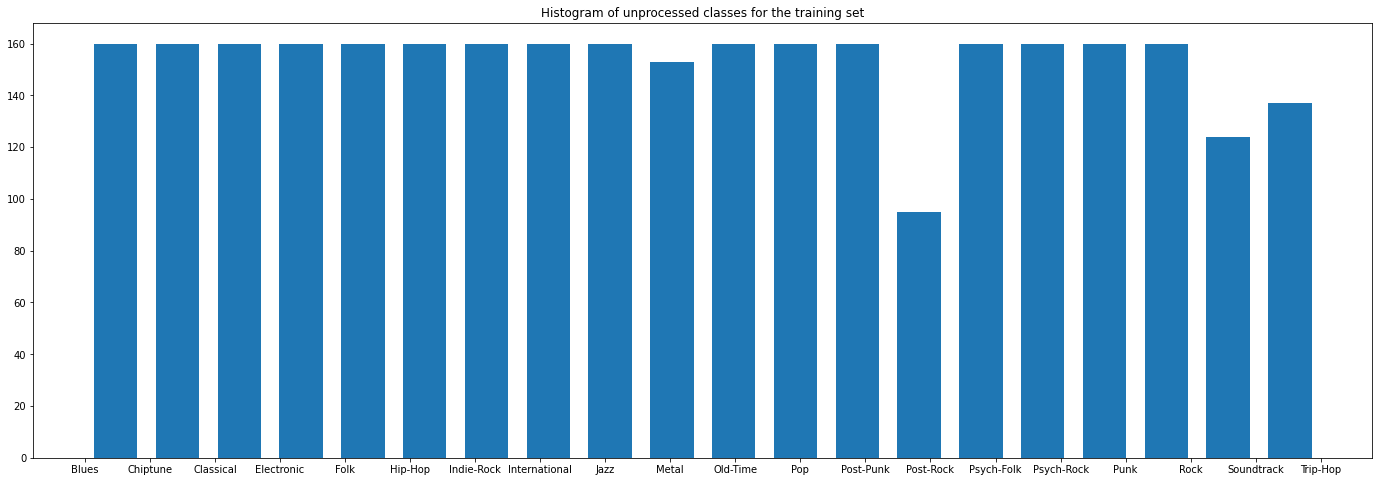

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(24,8))
plt.title('Histogram of unprocessed classes for the training set')
plt.hist(y_train, bins=len(unique_train), rwidth=0.7)
plt.show()

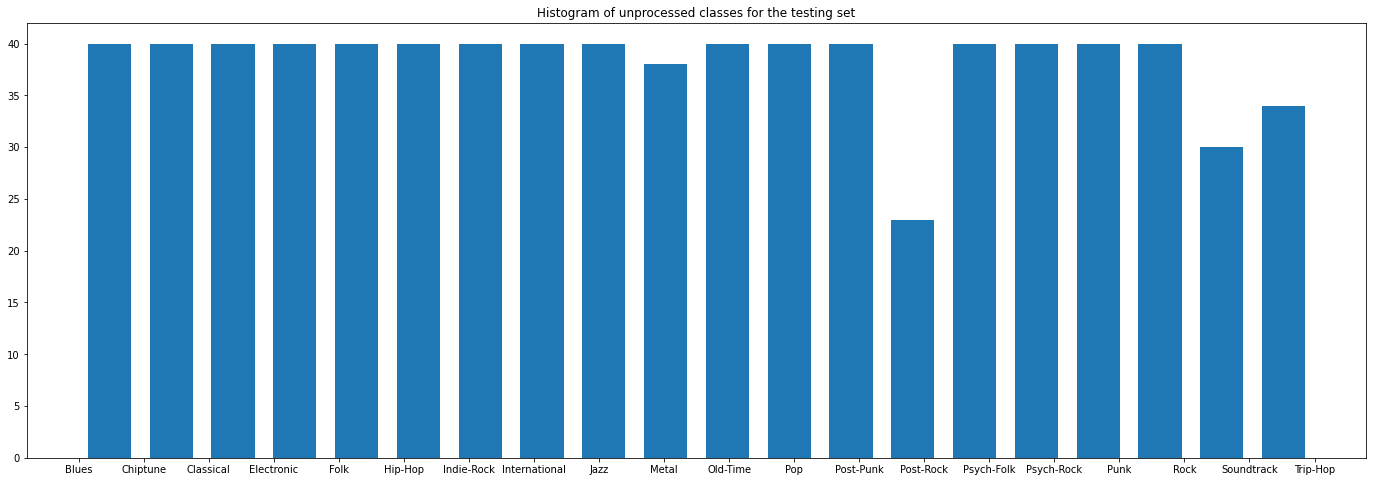

In [ ]:
plt.figure(figsize=(24,8))
plt.title('Histogram of unprocessed classes for the testing set')
plt.hist(y_test, bins=len(unique_test), rwidth=0.7)
plt.show()

## Μετά την ομαδοποίηση των κλάσεων

In [ ]:
y_train = []
y_test = []

file = open('../input/patreco3-multitask-affective-music/data/fma_genre_spectrograms_beat/train_labels.txt', 'r') 
for line in file.readlines()[1:]: 
    label = line.split()[1]
    if CLASS_MAPPING[label] is not None:
        y_train.append(CLASS_MAPPING[label])
    
file = open('../input/patreco3-multitask-affective-music/data/fma_genre_spectrograms_beat/test_labels.txt', 'r') 
for line in file.readlines()[1:]: 
    label = line.split()[1]
    if CLASS_MAPPING[label] is not None:
        y_test.append(CLASS_MAPPING[label])
unique_train = np.unique(np.array(y_train))
unique_test = np.unique(np.array(y_test))
print(unique_train)
print(unique_test)

['Blues' 'Classical' 'Electronic' 'Folk' 'Hip-Hop' 'Jazz' 'Metal' 'Pop'
 'Rock' 'Trip-Hop']
['Blues' 'Classical' 'Electronic' 'Folk' 'Hip-Hop' 'Jazz' 'Metal' 'Pop'
 'Rock' 'Trip-Hop']


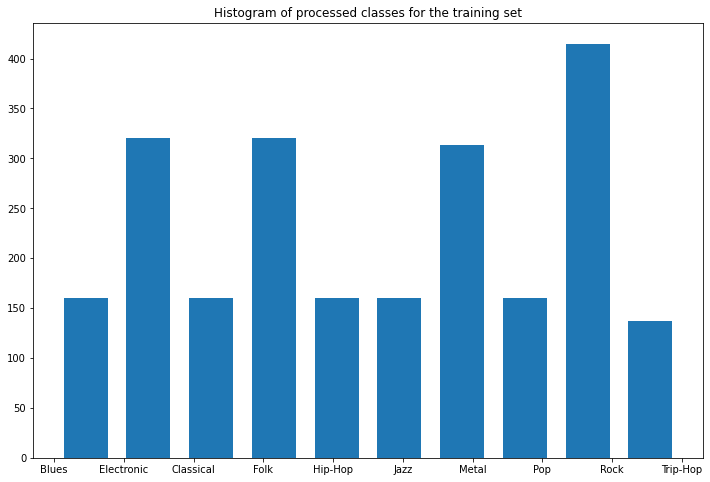

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Histogram of processed classes for the training set')
plt.hist(y_train, bins=len(unique_train), rwidth=0.7)
plt.show()

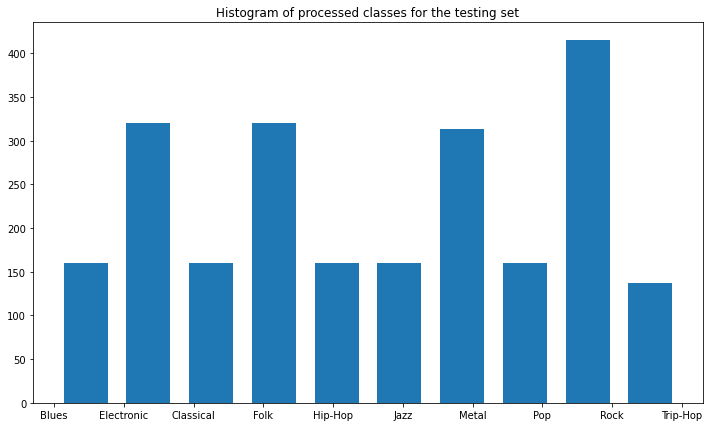

In [ ]:
plt.figure(figsize=(12,7))
plt.title('Histogram of processed classes for the testing set')
plt.hist(y_train, bins=len(unique_test), rwidth=0.7)
plt.show()

**Βήμα 5**

In [ ]:

import torch
import torch.nn as nn
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence


class PadPackedSequence(nn.Module):
    def __init__(self):
        """Wrap sequence padding in nn.Module
        Args:
            batch_first (bool, optional): Use batch first representation. Defaults to True.
        """
        super(PadPackedSequence, self).__init__()
        self.batch_first = True
        self.max_length = None

    def forward(self, x):
        """Convert packed sequence to padded sequence
        Args:
            x (torch.nn.utils.rnn.PackedSequence): Packed sequence
        Returns:
            torch.Tensor: Padded sequence
        """
        out, lengths = pad_packed_sequence(
            x, batch_first=self.batch_first, total_length=self.max_length  # type: ignore
        )
        lengths = lengths.to(out.device)
        return out, lengths  # type: ignore


class PackSequence(nn.Module):
    def __init__(self):
        """Wrap sequence packing in nn.Module
        Args:
            batch_first (bool, optional): Use batch first representation. Defaults to True.
        """
        super(PackSequence, self).__init__()
        self.batch_first = True

    def forward(self, x, lengths):
        """Pack a padded sequence and sort lengths
        Args:
            x (torch.Tensor): Padded tensor
            lengths (torch.Tensor): Original lengths befor padding
        Returns:
            Tuple[torch.nn.utils.rnn.PackedSequence, torch.Tensor]: (packed sequence, sorted lengths)
        """
        lengths = lengths.to("cpu")
        out = pack_padded_sequence(
            x, lengths, batch_first=self.batch_first, enforce_sorted=False
        )

        return out

In [ ]:
class LSTMBackbone(nn.Module):
    def __init__(
        self,
        input_dim,
        rnn_size=128,
        num_layers=1,
        bidirectional=False,
        dropout=0.1,
    ):
        super(LSTMBackbone, self).__init__()
        self.bidirectional = bidirectional
        self.feature_size = rnn_size * 2 if self.bidirectional else rnn_size

        self.input_dim = input_dim
        self.rnn_size = rnn_size
        self.num_layers = num_layers
        self.hidden_size = rnn_size
        self.pack = PackSequence()
        self.unpack = PadPackedSequence()
        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=rnn_size,
            num_layers=num_layers,
            batch_first=True,
            bidirectional=self.bidirectional,
            dropout=dropout,
        )
        self.drop = nn.Dropout(dropout)
    def forward(self, x, lengths):
        """LSTM forward
        Args:
            x (torch.Tensor):
                [B, S, F] Batch size x sequence length x feature size
                padded inputs
            lengths (torch.tensor):
                [B] Original lengths of each padded sequence in the batch
        Returns:
            torch.Tensor:
                [B, H] Batch size x hidden size lstm last timestep outputs
                2 x hidden_size if bidirectional
        """
        packed = self.pack(x, lengths)
        output, _ = self.lstm(packed)
        output, lengths = self.unpack(output)
        output = self.drop(output)

        rnn_all_outputs, last_timestep = self._final_output(output, lengths)
        # Use the last_timestep for classification / regression
        # Alternatively rnn_all_outputs can be used with an attention mechanism
        return last_timestep
    def _merge_bi(self, forward, backward):
        """Merge forward and backward states
        Args:
            forward (torch.Tensor): [B, L, H] Forward states
            backward (torch.Tensor): [B, L, H] Backward states
        Returns:
            torch.Tensor: [B, L, 2*H] Merged forward and backward states
        """
        return torch.cat((forward, backward), dim=-1)

    def _final_output(self, out, lengths):
        """Create RNN ouputs
        Collect last hidden state for forward and backward states
        Code adapted from https://stackoverflow.com/a/50950188
        Args:
            out (torch.Tensor): [B, L, num_directions * H] RNN outputs
            lengths (torch.Tensor): [B] Original sequence lengths
        Returns:
            Tuple[torch.Tensor, torch.Tensor]: (
                merged forward and backward states [B, L, H] or [B, L, 2*H],
                merged last forward and backward state [B, H] or [B, 2*H]
            )
        """

        if not self.bidirectional:
            return out, self._select_last_unpadded(out, lengths)

        forward, backward = (out[..., : self.hidden_size], out[..., self.hidden_size :])
        # Last backward corresponds to first token
        last_backward_out = backward[:, 0, :]
        # Last forward for real length or seq (unpadded tokens)
        last_forward_out = self._select_last_unpadded(forward, lengths)
        out = self._merge_bi(forward, backward)

        return out, self._merge_bi(last_forward_out, last_backward_out)

    def _select_last_unpadded(self, out, lengths):
        """Get the last timestep before padding starts
        Args:
            out (torch.Tensor): [B, L, H] Fprward states
            lengths (torch.Tensor): [B] Original sequence lengths
        Returns:
            torch.Tensor: [B, H] Features for last sequence timestep
        """
        gather_dim = 1  # Batch first
        gather_idx = (
            (lengths - 1)  # -1 to convert to indices
            .unsqueeze(1)  # (B) -> (B, 1)
            .expand((-1, self.hidden_size))  # (B, 1) -> (B, H)
            # (B, 1, H) if batch_first else (1, B, H)
            .unsqueeze(gather_dim)
        )
        # Last forward for real length or seq (unpadded tokens)
        last_out = out.gather(gather_dim, gather_idx).squeeze(gather_dim)

        return last_out

In [ ]:
def train_LSTM(train_set, val_set, input_size):
    # Device configuration
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Hyper-parameters
    input_size = input_size
    rnn_size = 32
    num_layers = 2
    num_epochs = 50
    bidirectional = True

    model = LSTMBackbone(input_size, rnn_size, num_layers, bidirectional=bidirectional)
    model.to(device)
    model = model.double()

    # Loss and optimizer
    loss_function  = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

    # Train the model
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        # Οbtain the model's device ID
        device = next(model.parameters()).device
        for index, batch in enumerate(train_set):
            features, labels, lengths = batch

            # Move the batch tensors to the right device
            features = features.to(device)
            labels = labels.to(device)

            # Step 1 - zero the gradients
            # Remember that PyTorch accumulates gradients.
            # We need to clear them out before each batch!
            optimizer.zero_grad()
            # Step 2 - forward pass: y' = model(x)
            y_preds = model(features, lengths)
            # Step 3 - compute loss: L = loss_function(y, y')
            loss = loss_function(y_preds, labels)
            # Step 4 - backward pass: compute gradient wrt model parameters
            loss.backward()
            # Step 5 - update weights
            optimizer.step()
            # Accumulate loss in a variable.
            train_loss += loss.data.item()
        train_loss = train_loss / index
        model.eval()
        validation_loss = 0.0
        y_pred = []  # the predicted labels
        y = []  # the gold labels
        # Obtain the model's device ID
        device = next(model.parameters()).device
        # IMPORTANT: in evaluation mode, we don't want to keep the gradients
        # so we do everything under torch.no_grad()
        with torch.no_grad():
            for index, batch in enumerate(val_set):
                # Get the inputs (batch)
                features, labels, lengths = batch
                # Step 1 - move the batch tensors to the right device
                features = features.to(device)
                labels = labels.to(device)
                # Step 2 - forward pass: y' = model(x)
                y_preds = model(features, lengths)  # EX9
                # Step 3 - compute loss: L = loss_function(y, y')
                # We compute the loss only for inspection (compare train/test loss)
                # because we do not actually backpropagate in test time
                loss = loss_function(y_preds, labels)
                # Step 4 - make predictions (class = argmax of posteriors)
                y_preds_arg = torch.argmax(y_preds, dim=1)
                # Step 5 - collect the predictions, gold labels and batch loss
                y_pred.append(y_preds_arg.cpu().numpy())
                y.append(labels.cpu().numpy())
                # Accumulate loss in a variable
                validation_loss += loss.data.item()
        validation_loss = validation_loss/index
        if epoch%5 == 0 or epoch == 49: 
            print("For Epoch",epoch, ':', 'Train loss =', train_loss, 'and Validation loss =', validation_loss)
            print()
    return model
   

In [ ]:
from sklearn.metrics import classification_report

def evaluate(test_loader, model):
    model.eval()

    y_pred = []  # the predicted labels
    y = []  # the gold labels
    # Obtain the model's device ID
    device = next(model.parameters()).device
    with torch.no_grad():
        for index, batch in enumerate(test_loader):
            # Get the inputs (batch)
            inputs, labels, lengths = batch
            inputs = inputs.to(device)
            labels = labels.to(device)
            y_preds = model(inputs, lengths) 
            y_preds_arg = torch.argmax(y_preds, dim=1)
            y_pred.append(y_preds_arg.cpu().numpy())
            y.append(labels.cpu().numpy())
    print(classification_report(y, y_pred))